Import Statements

In [60]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

Load the train and test datasets

In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False


In [3]:
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.00,False,0.00,0.00,0.00,0.00,0.00,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.00,False,0.00,847.00,17.00,10.00,144.00,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.00,2680.00,0.00,0.00,523.00,Kitakan Conale


Get the information about the datasets for numeric columns

In [4]:
train_desc = train.describe()
train_desc

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [5]:
test_desc = test.describe()
test_desc

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.00,4195.00,4171.00,4179.00,4176.00,4197.00
mean,28.66,219.27,439.48,177.30,303.05,310.71
std,14.18,607.01,1527.66,560.82,1117.19,1246.99
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,0.00,0.00,0.00,0.00,0.00
75%,37.00,53.00,78.00,33.00,50.00,36.00
max,79.00,11567.00,25273.00,8292.00,19844.00,22272.00


Difference in values for the numeric columns - if less then distribution MIGHT be same but need to confirm

In [6]:
train_test_diff = train_desc.sub(test_desc).abs()
train_test_diff

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4328.00,4317.00,4339.00,4306.00,4334.00,4308.00
mean,0.17,5.42,18.59,3.57,8.09,5.86
std,0.31,59.71,83.83,43.88,19.52,101.28
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,6.00,2.00,6.00,9.00,10.00
max,0.00,2760.00,4540.00,15200.00,2564.00,1861.00


Let's normalize the numeric columns and check the same

In [7]:
numeric_columns = train.select_dtypes(include=['int', 'float']).columns
train_numeric = train[numeric_columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_numeric)
train_normal = pd.DataFrame(normalized_data, columns=numeric_columns)
train_normal

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.49,0.00,0.00,0.00,0.00,0.00
1,0.30,0.01,0.00,0.00,0.02,0.00
2,0.73,0.00,0.12,0.00,0.30,0.00
3,0.42,0.00,0.04,0.02,0.15,0.01
4,0.20,0.02,0.00,0.01,0.03,0.00
...,...,...,...,...,...,...
8688,0.52,0.00,0.23,0.00,0.07,0.00
8689,0.23,0.00,0.00,0.00,0.00,0.00
8690,0.33,0.00,0.00,0.08,0.00,0.00
8691,0.41,0.00,0.04,0.00,0.02,0.13


In [8]:
numeric_columns = test.select_dtypes(include=['int', 'float']).columns
test_numeric = test[numeric_columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(test_numeric)
test_normal = pd.DataFrame(normalized_data, columns=numeric_columns)
test_normal

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.34,0.00,0.00,0.00,0.00,0.00
1,0.24,0.00,0.00,0.00,0.14,0.00
2,0.39,0.00,0.00,0.00,0.00,0.00
3,0.48,0.00,0.26,0.00,0.01,0.03
4,0.25,0.00,0.00,0.08,0.00,0.00
...,...,...,...,...,...,...
4272,0.43,0.00,0.00,0.00,0.00,0.00
4273,0.53,0.00,0.03,0.00,0.00,0.01
4274,NaN,0.00,0.00,0.00,0.00,0.00
4275,NaN,0.00,0.11,0.00,0.00,0.02


In [9]:
train_desc_normal = train_normal.describe()
train_desc_normal

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,0.36,0.02,0.02,0.01,0.01,0.01
std,0.18,0.05,0.05,0.03,0.05,0.05
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.00,0.00,0.00,0.00,0.00
50%,0.34,0.00,0.00,0.00,0.00,0.00
75%,0.48,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
test_desc_normal = test_normal.describe()
test_desc_normal

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.00,4195.00,4171.00,4179.00,4176.00,4197.00
mean,0.36,0.02,0.02,0.02,0.02,0.01
std,0.18,0.05,0.06,0.07,0.06,0.06
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.00,0.00,0.00,0.00,0.00
50%,0.33,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00


In [11]:
train_test_normal_diff = train_desc_normal.sub(test_desc_normal).abs()
train_test_normal_diff

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4328.00,4317.00,4339.00,4306.00,4334.00,4308.00
mean,0.00,0.00,0.00,0.01,0.00,0.00
std,0.00,0.01,0.01,0.04,0.01,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.01,0.00,0.00,0.00,0.00,0.00
75%,0.01,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00


The distributions of the data of the numeric columns seem to be same but let's check the correlations and the bar plots as well to confirm our hypothesis. Before that we need to impute the null values in our dataset if they exist.

In [12]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Use KNN Imputation in order to impute the numeric columns' null values and for the categorical ones, fill them with 'Missing'

In [14]:
numerical_columns = train.select_dtypes(include='number').columns

categorical_columns = train.select_dtypes(include=['object','bool']).columns

imputer = KNNImputer(n_neighbors=5)
train_numerical_imputed = pd.DataFrame(imputer.fit_transform(train[numerical_columns]), columns=numerical_columns)

train_categorical_imputed = train[categorical_columns].fillna('Missing')

train_imputed = pd.concat([train_numerical_imputed, train_categorical_imputed], axis=1)

train_imputed

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,39.00,0.00,0.00,0.00,0.00,0.00,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,24.00,109.00,9.00,25.00,549.00,44.00,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,58.00,43.00,3576.00,0.00,6715.00,49.00,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,33.00,0.00,1283.00,371.00,3329.00,193.00,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,16.00,303.00,70.00,151.00,565.00,2.00,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.00,0.00,6819.00,0.00,1643.00,74.00,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,18.00,0.00,0.00,0.00,0.00,0.00,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,26.00,0.00,0.00,1872.00,1.00,0.00,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,32.00,0.00,1049.00,0.00,353.00,3235.00,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


In [15]:
categorical_columns = test.select_dtypes(include=['object','bool']).columns

imputer = KNNImputer(n_neighbors=5)
test_numerical_imputed = pd.DataFrame(imputer.fit_transform(test[numerical_columns]), columns=numerical_columns)

test_categorical_imputed = test[categorical_columns].fillna('Missing')

test_imputed = pd.concat([test_numerical_imputed, test_categorical_imputed], axis=1)

test_imputed

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,27.00,0.00,0.00,0.00,0.00,0.00,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,19.00,0.00,9.00,0.00,2823.00,0.00,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,31.00,0.00,0.00,0.00,0.00,0.00,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,38.00,0.00,6652.00,0.00,181.00,585.00,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,20.00,10.00,0.00,635.00,0.00,0.00,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00,0.00,0.00,0.00,0.00,0.00,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
4273,42.00,0.00,847.00,17.00,10.00,144.00,9269_01,Earth,False,Missing,TRAPPIST-1e,False,Matty Scheron
4274,9.40,0.00,0.00,0.00,0.00,0.00,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
4275,29.00,0.00,2680.00,0.00,0.00,523.00,9273_01,Europa,False,D/297/P,Missing,False,Kitakan Conale


In [16]:
train_imputed.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
Transported     0
dtype: int64

In [17]:
test_imputed.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
dtype: int64

In [18]:
train = train_imputed
test = test_imputed

We can observe that the cabin column is a bit complicated so let's simplify that

In [19]:
def split_cabin(x):
    if len(str(x).split('/')) < 3:
        return ['Missing', 'Missing', 'Missing']
    else:   
        return str(x).split('/')

In [20]:
train['Temp'] = train['Cabin'].apply(lambda x: split_cabin(x))
train['Cabin_deck'] = train['Temp'].apply(lambda x: x[0])
train['Cabin_name'] = train['Temp'].apply(lambda x: x[1])
train['Cabin_side'] = train['Temp'].apply(lambda x: x[2])
test['Temp'] = test['Cabin'].apply(lambda x: split_cabin(x))
test['Cabin_deck'] = test['Temp'].apply(lambda x: x[0])
test['Cabin_name'] = test['Temp'].apply(lambda x: x[1])
test['Cabin_side'] = test['Temp'].apply(lambda x: x[2])

In [21]:
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,Temp,Cabin_deck,Cabin_name,Cabin_side
0,39.00,0.00,0.00,0.00,0.00,0.00,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False,"[B, 0, P]",B,0,P
1,24.00,109.00,9.00,25.00,549.00,44.00,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True,"[F, 0, S]",F,0,S
2,58.00,43.00,3576.00,0.00,6715.00,49.00,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False,"[A, 0, S]",A,0,S
3,33.00,0.00,1283.00,371.00,3329.00,193.00,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False,"[A, 0, S]",A,0,S
4,16.00,303.00,70.00,151.00,565.00,2.00,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True,"[F, 1, S]",F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.00,0.00,6819.00,0.00,1643.00,74.00,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False,"[A, 98, P]",A,98,P
8689,18.00,0.00,0.00,0.00,0.00,0.00,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False,"[G, 1499, S]",G,1499,S
8690,26.00,0.00,0.00,1872.00,1.00,0.00,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True,"[G, 1500, S]",G,1500,S
8691,32.00,0.00,1049.00,0.00,353.00,3235.00,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False,"[E, 608, S]",E,608,S


In [22]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Temp,Cabin_deck,Cabin_name,Cabin_side
0,27.00,0.00,0.00,0.00,0.00,0.00,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning,"[G, 3, S]",G,3,S
1,19.00,0.00,9.00,0.00,2823.00,0.00,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers,"[F, 4, S]",F,4,S
2,31.00,0.00,0.00,0.00,0.00,0.00,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus,"[C, 0, S]",C,0,S
3,38.00,0.00,6652.00,0.00,181.00,585.00,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter,"[C, 1, S]",C,1,S
4,20.00,10.00,0.00,635.00,0.00,0.00,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez,"[F, 5, S]",F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00,0.00,0.00,0.00,0.00,0.00,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter,"[G, 1496, S]",G,1496,S
4273,42.00,0.00,847.00,17.00,10.00,144.00,9269_01,Earth,False,Missing,TRAPPIST-1e,False,Matty Scheron,"[Missing, Missing, Missing]",Missing,Missing,Missing
4274,9.40,0.00,0.00,0.00,0.00,0.00,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore,"[D, 296, P]",D,296,P
4275,29.00,0.00,2680.00,0.00,0.00,523.00,9273_01,Europa,False,D/297/P,Missing,False,Kitakan Conale,"[D, 297, P]",D,297,P


Let's check the number of unique values in each column (More important for categorical columns). We need to drop the Temp column from our train and test data as well as it's no longer of use

In [23]:
train.drop('Temp',axis=1,inplace=True)
train.nunique()

Age              131
RoomService     1344
FoodCourt       1566
ShoppingMall    1180
Spa             1396
VRDeck          1365
PassengerId     8693
HomePlanet         4
CryoSleep          3
Cabin           6561
Destination        4
VIP                3
Name            8474
Transported        2
Cabin_deck         9
Cabin_name      1818
Cabin_side         3
dtype: int64

In [24]:
test.drop('Temp',axis=1,inplace=True)
test.nunique()

Age              118
RoomService      877
FoodCourt        940
ShoppingMall     758
Spa              870
VRDeck           820
PassengerId     4277
HomePlanet         4
CryoSleep          3
Cabin           3266
Destination        4
VIP                3
Name            4177
Cabin_deck         9
Cabin_name      1506
Cabin_side         3
dtype: int64

We can see that for the categorical columns Cabin, Name, and Cabin_name the number of unique values are very high which would increase the number of columns in our dataframe after OHE. We need to decide to keep or discard them based on their correlations with each other and with our target column.

To check the correlations, let us convert out categorical columns into numerical ones by assigning a number to every unique value in the column.

In [25]:
def convert_to_integer(df):
    mappings = {}
    converted_df = df.copy()

    for column in df.columns:
        if df[column].dtype == bool or df[column].dtype == object:
            unique_values = df[column].unique()
            mapping = {value: index for index, value in enumerate(unique_values)}
            mappings[column] = mapping
            converted_df[column] = converted_df[column].map(mapping)

    return converted_df

train1 = convert_to_integer(train)
test1 = convert_to_integer(test)

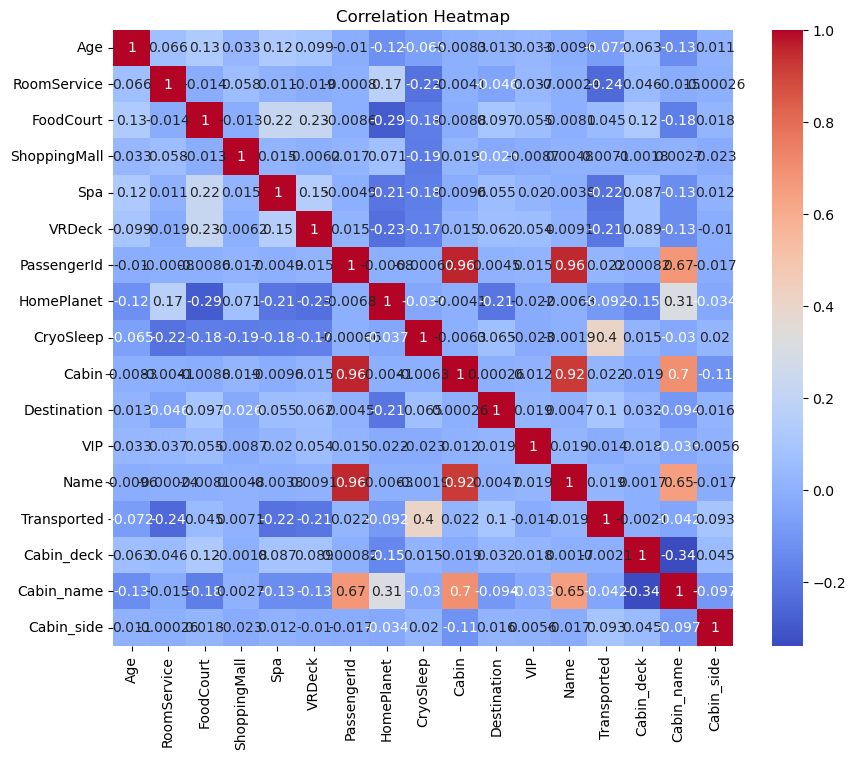

In [26]:
correlation_matrix = train1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

We can drop the columns of PassengerId (Because it is unique for all passengers), Name, Cabin_name, and cabin due to high inter-related correlation and low correlation with Transported column.

In [27]:
passengers = test['PassengerId'] #saving for later use

In [28]:
train.drop(['PassengerId','Cabin','Name','Cabin_name'],axis=1,inplace=True)
test.drop(['PassengerId','Cabin','Name','Cabin_name'],axis=1,inplace=True)

In [29]:
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Transported,Cabin_deck,Cabin_side
0,39.00,0.00,0.00,0.00,0.00,0.00,Europa,False,TRAPPIST-1e,False,False,B,P
1,24.00,109.00,9.00,25.00,549.00,44.00,Earth,False,TRAPPIST-1e,False,True,F,S
2,58.00,43.00,3576.00,0.00,6715.00,49.00,Europa,False,TRAPPIST-1e,True,False,A,S
3,33.00,0.00,1283.00,371.00,3329.00,193.00,Europa,False,TRAPPIST-1e,False,False,A,S
4,16.00,303.00,70.00,151.00,565.00,2.00,Earth,False,TRAPPIST-1e,False,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.00,0.00,6819.00,0.00,1643.00,74.00,Europa,False,55 Cancri e,True,False,A,P
8689,18.00,0.00,0.00,0.00,0.00,0.00,Earth,True,PSO J318.5-22,False,False,G,S
8690,26.00,0.00,0.00,1872.00,1.00,0.00,Earth,False,TRAPPIST-1e,False,True,G,S
8691,32.00,0.00,1049.00,0.00,353.00,3235.00,Europa,False,55 Cancri e,False,False,E,S


In [30]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Cabin_deck,Cabin_side
0,27.00,0.00,0.00,0.00,0.00,0.00,Earth,True,TRAPPIST-1e,False,G,S
1,19.00,0.00,9.00,0.00,2823.00,0.00,Earth,False,TRAPPIST-1e,False,F,S
2,31.00,0.00,0.00,0.00,0.00,0.00,Europa,True,55 Cancri e,False,C,S
3,38.00,0.00,6652.00,0.00,181.00,585.00,Europa,False,TRAPPIST-1e,False,C,S
4,20.00,10.00,0.00,635.00,0.00,0.00,Earth,False,TRAPPIST-1e,False,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00,0.00,0.00,0.00,0.00,0.00,Earth,True,TRAPPIST-1e,False,G,S
4273,42.00,0.00,847.00,17.00,10.00,144.00,Earth,False,TRAPPIST-1e,False,Missing,Missing
4274,9.40,0.00,0.00,0.00,0.00,0.00,Mars,True,55 Cancri e,False,D,P
4275,29.00,0.00,2680.00,0.00,0.00,523.00,Europa,False,Missing,False,D,P


Now, let us check the distributions of each column after using one hot encoding on the categorical columns after normalizing the data.

In [31]:
categorical_columns = train.select_dtypes(include=['object']).columns

train_encoded = pd.get_dummies(train, columns=categorical_columns)

train = train_encoded

train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_Missing,Cabin_deck_T,Cabin_side_Missing,Cabin_side_P,Cabin_side_S
0,39.00,0.00,0.00,0.00,0.00,0.00,False,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,24.00,109.00,9.00,25.00,549.00,44.00,True,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,58.00,43.00,3576.00,0.00,6715.00,49.00,False,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,33.00,0.00,1283.00,371.00,3329.00,193.00,False,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,16.00,303.00,70.00,151.00,565.00,2.00,True,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.00,0.00,6819.00,0.00,1643.00,74.00,False,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.00,0.00,0.00,0.00,0.00,0.00,False,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8690,26.00,0.00,0.00,1872.00,1.00,0.00,True,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8691,32.00,0.00,1049.00,0.00,353.00,3235.00,False,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
categorical_columns = test.select_dtypes(include=['object']).columns

test_encoded = pd.get_dummies(test, columns=categorical_columns)

test = test_encoded

test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_Missing,Cabin_deck_T,Cabin_side_Missing,Cabin_side_P,Cabin_side_S
0,27.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,19.00,0.00,9.00,0.00,2823.00,0.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,31.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,38.00,0.00,6652.00,0.00,181.00,585.00,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,20.00,10.00,0.00,635.00,0.00,0.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4273,42.00,0.00,847.00,17.00,10.00,144.00,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4274,9.40,0.00,0.00,0.00,0.00,0.00,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4275,29.00,0.00,2680.00,0.00,0.00,523.00,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [33]:
numeric_columns = train.select_dtypes(include=['int', 'float', 'uint8']).columns
train_numeric = train[numeric_columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_numeric)
train_normal = pd.DataFrame(normalized_data, columns=numeric_columns)
train_normal

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_Missing,Cabin_deck_T,Cabin_side_Missing,Cabin_side_P,Cabin_side_S
0,0.49,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.30,0.01,0.00,0.00,0.02,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.73,0.00,0.12,0.00,0.30,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.42,0.00,0.04,0.02,0.15,0.01,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.20,0.02,0.00,0.01,0.03,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.52,0.00,0.23,0.00,0.07,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
8689,0.23,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
8690,0.33,0.00,0.00,0.08,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
8691,0.41,0.00,0.04,0.00,0.02,0.13,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [34]:
numeric_columns = test.select_dtypes(include=['int', 'float', 'uint8']).columns
test_numeric = test[numeric_columns]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(test_numeric)
test_normal = pd.DataFrame(normalized_data, columns=numeric_columns)
test_normal

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_Missing,Cabin_deck_T,Cabin_side_Missing,Cabin_side_P,Cabin_side_S
0,0.34,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,0.24,0.00,0.00,0.00,0.14,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.39,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.48,0.00,0.26,0.00,0.01,0.03,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.25,0.00,0.00,0.08,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.43,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
4273,0.53,0.00,0.03,0.00,0.00,0.01,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4274,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4275,0.37,0.00,0.11,0.00,0.00,0.02,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


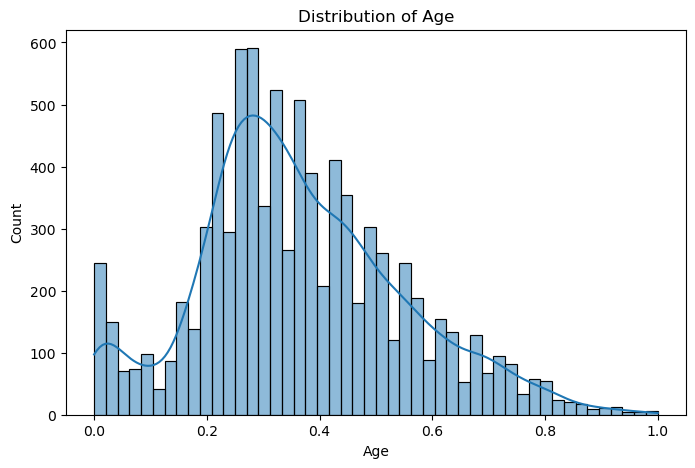

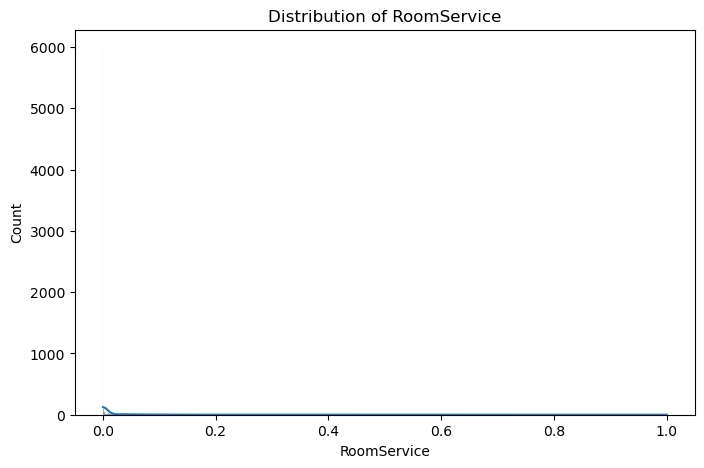

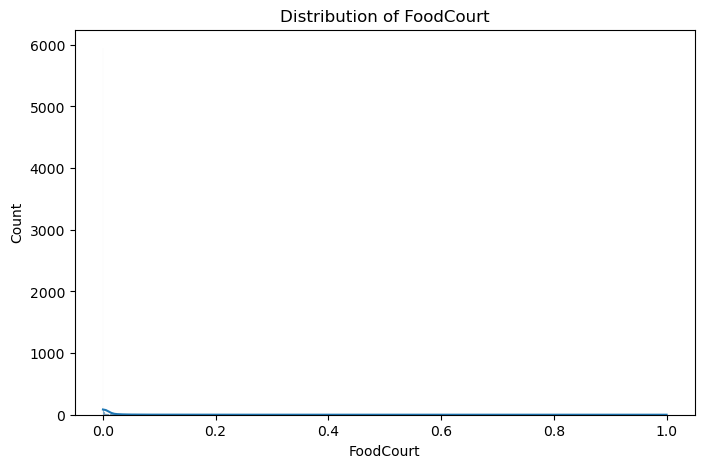

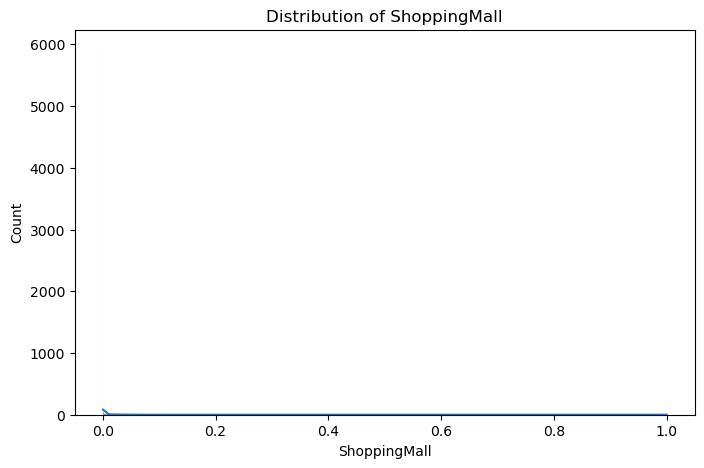

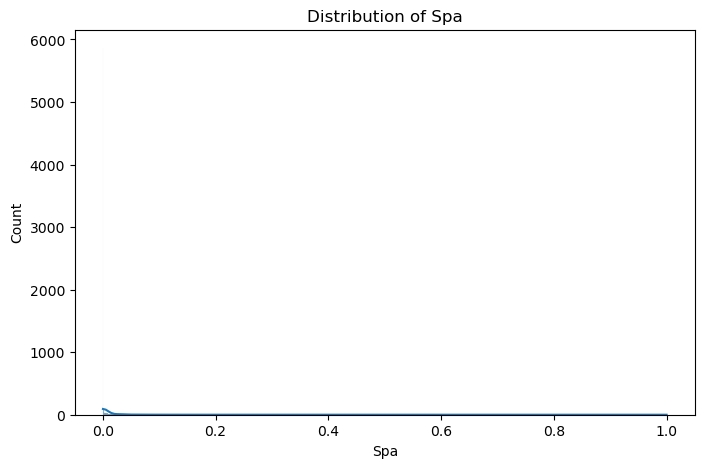

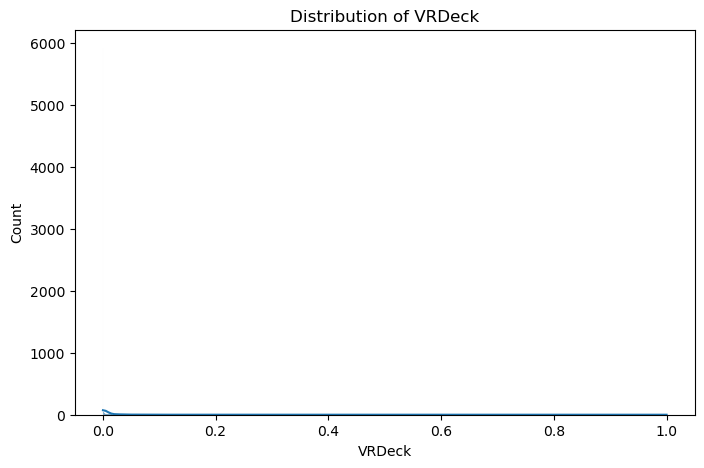

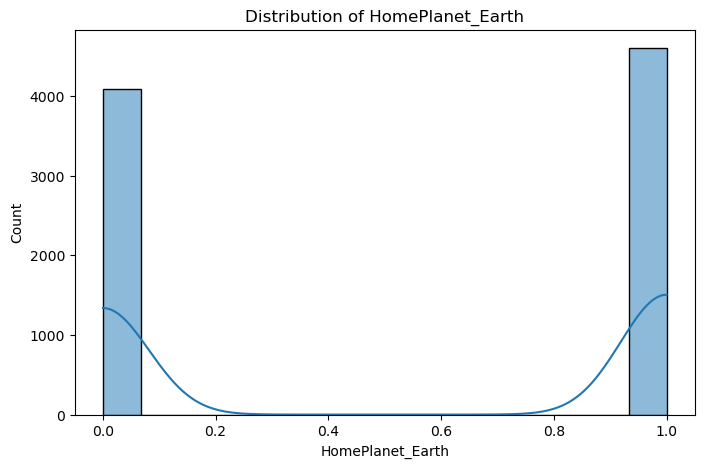

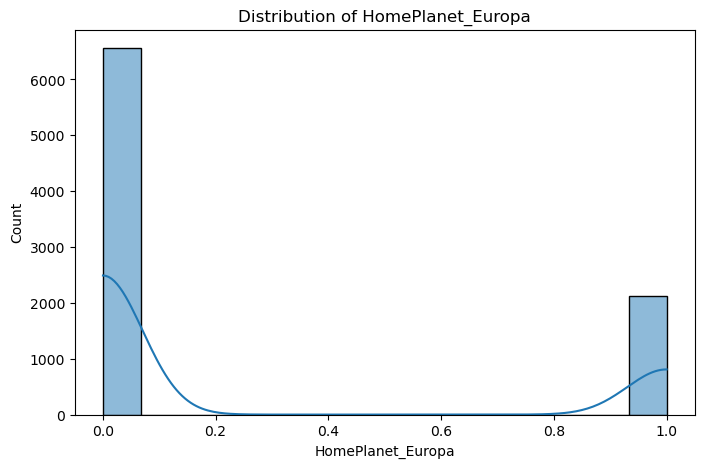

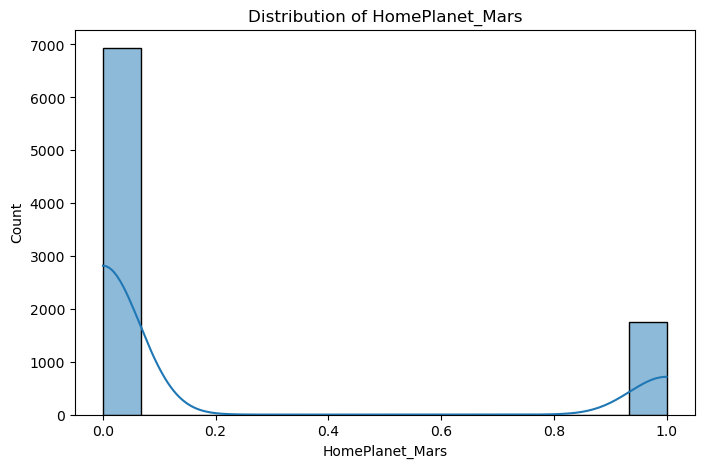

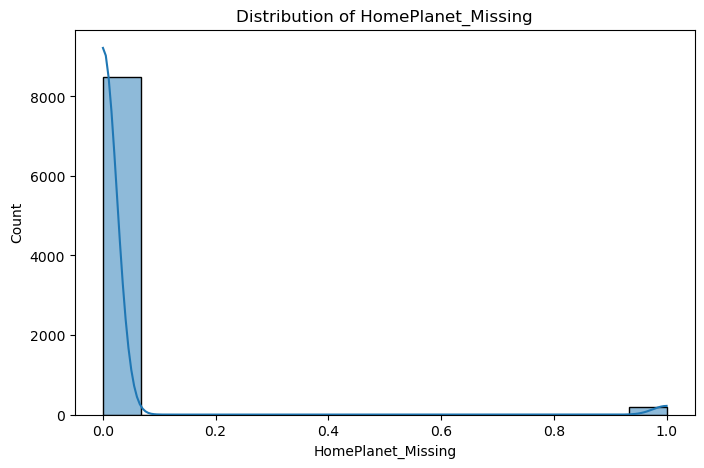

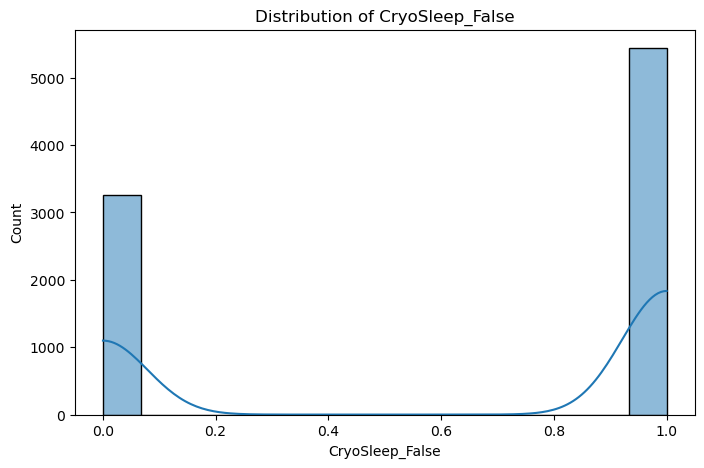

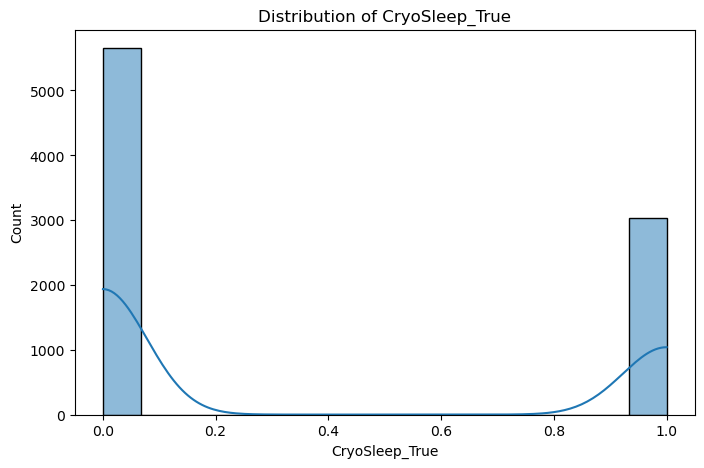

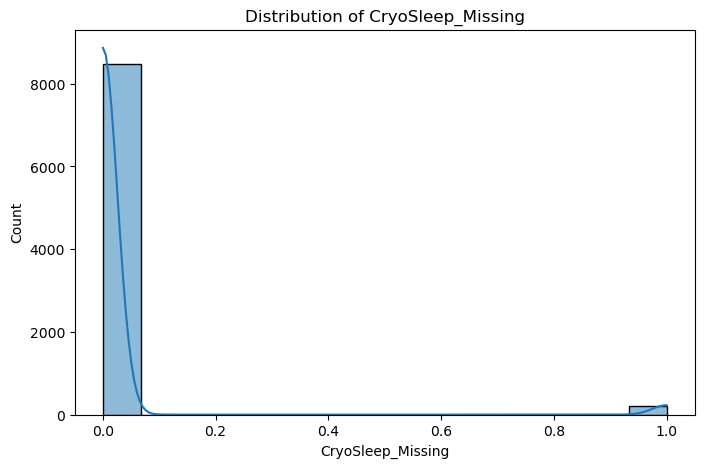

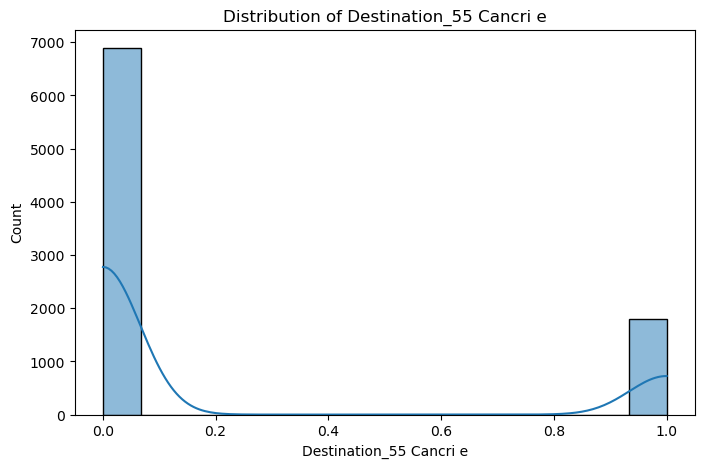

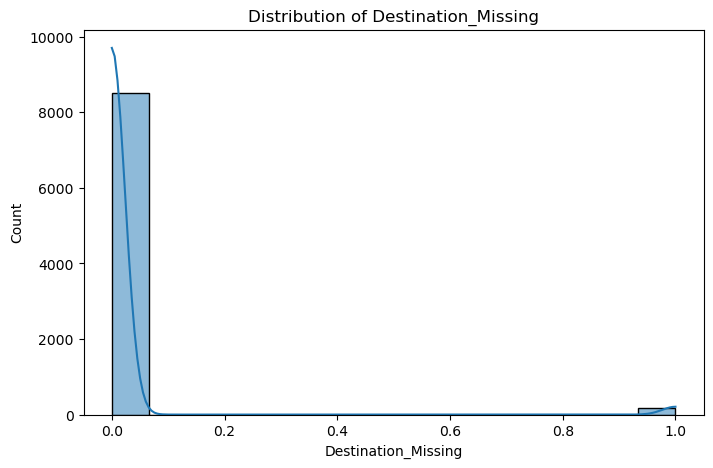

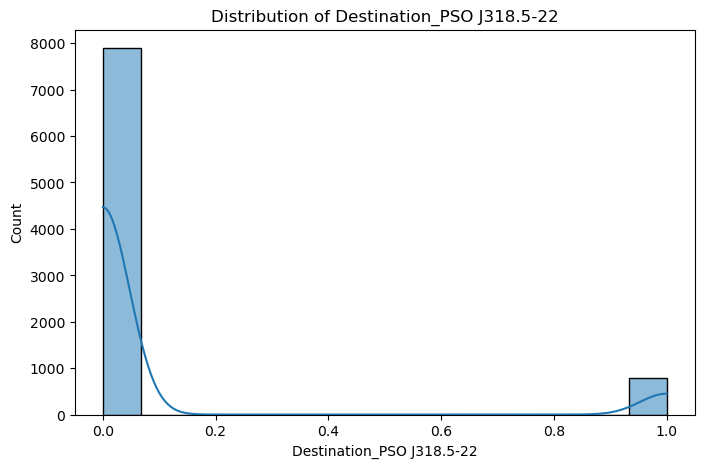

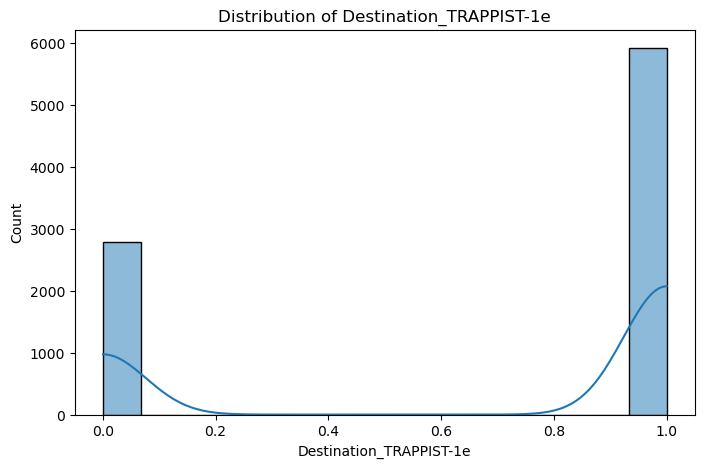

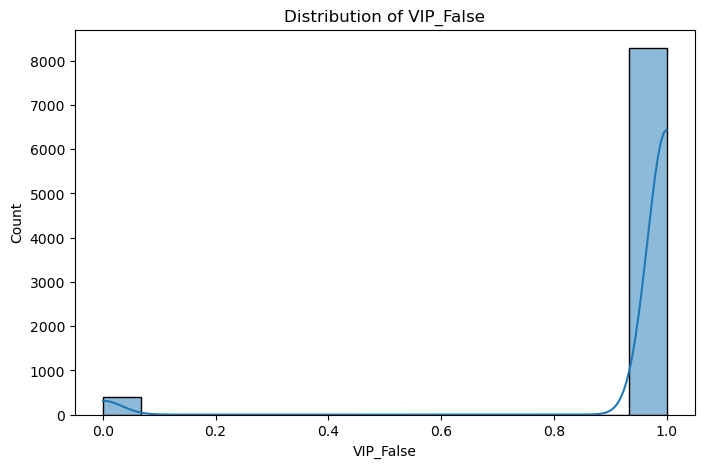

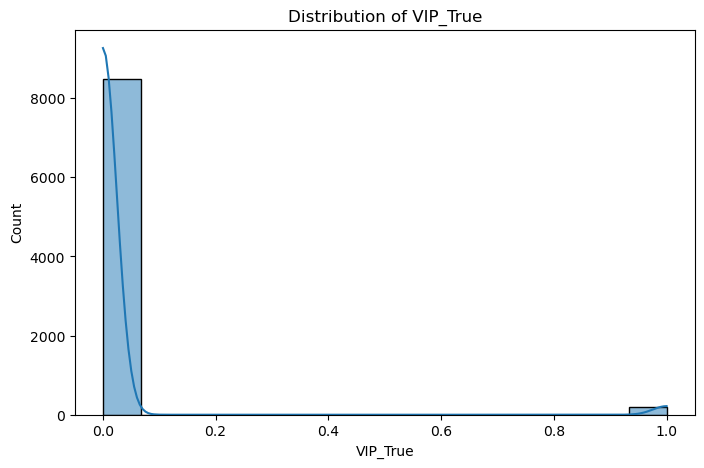

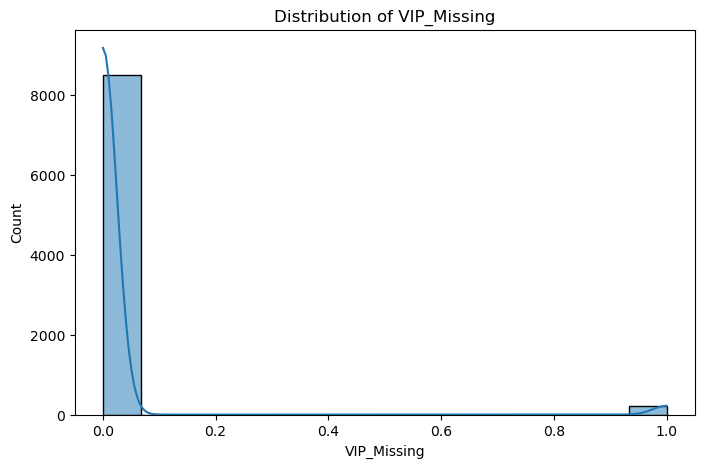

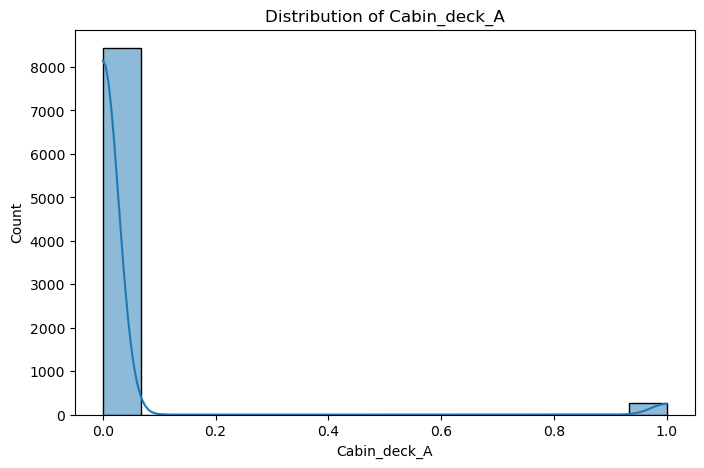

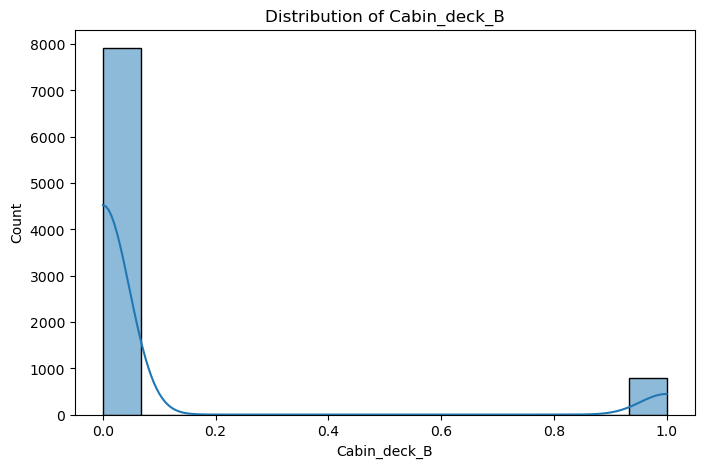

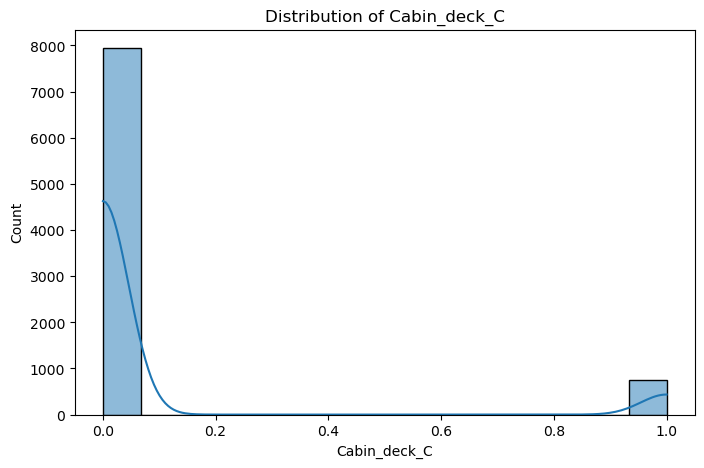

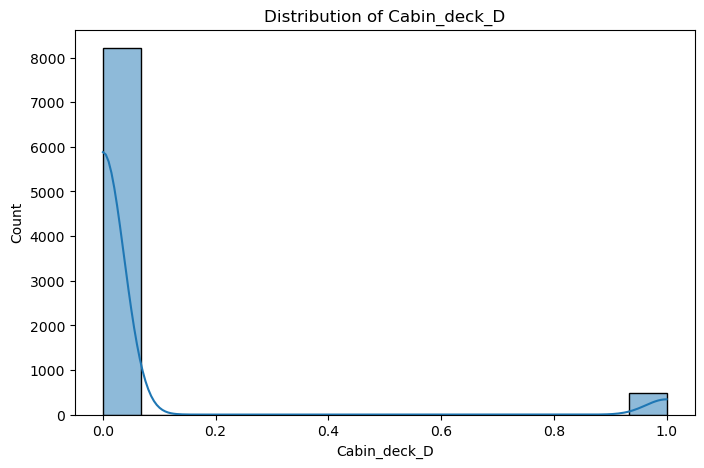

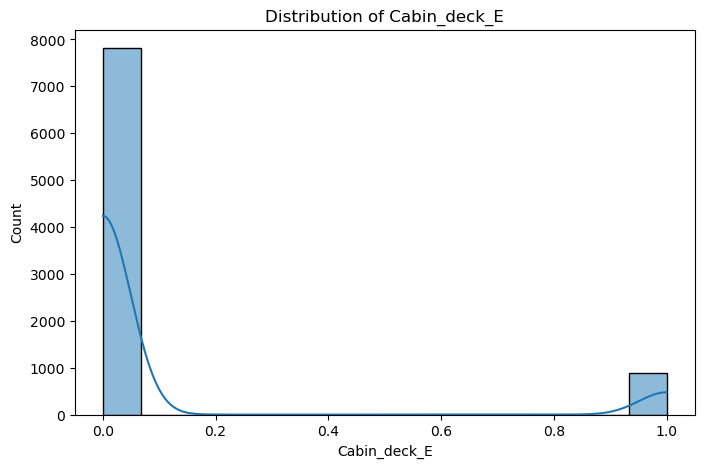

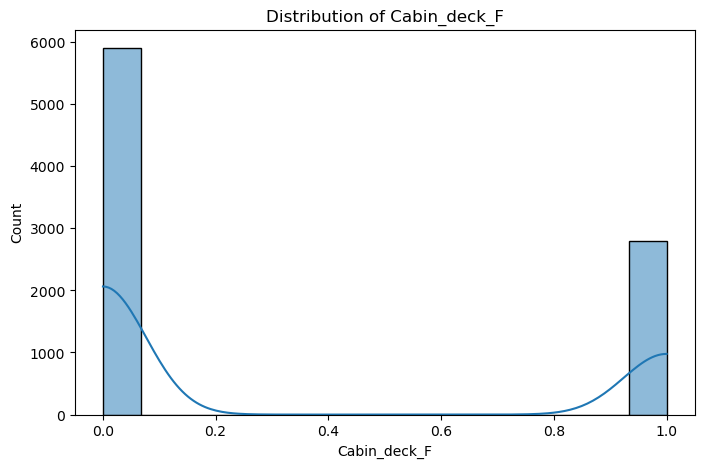

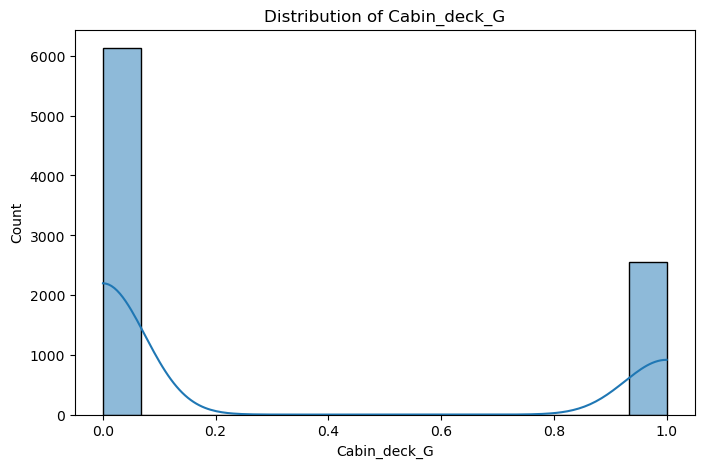

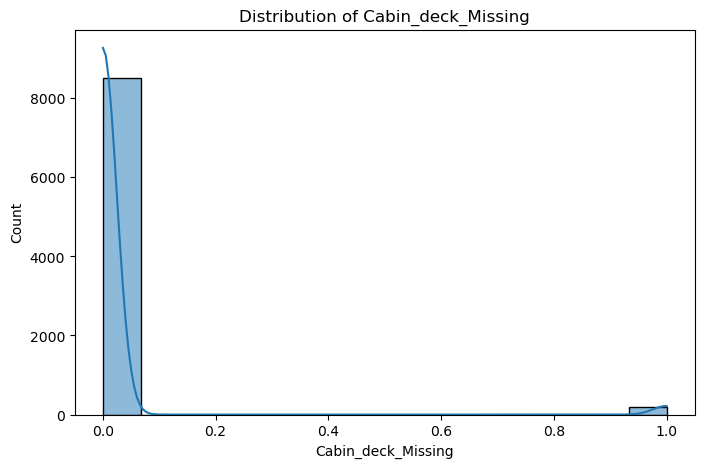

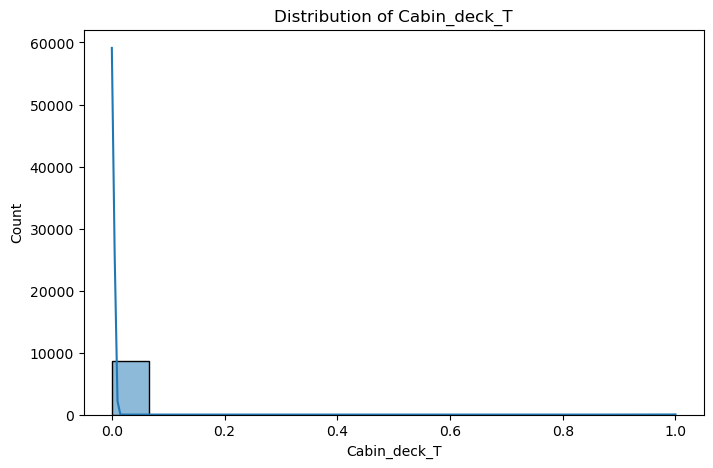

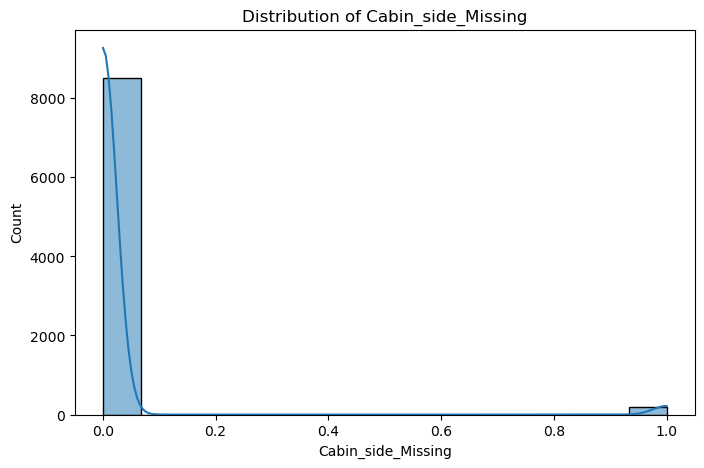

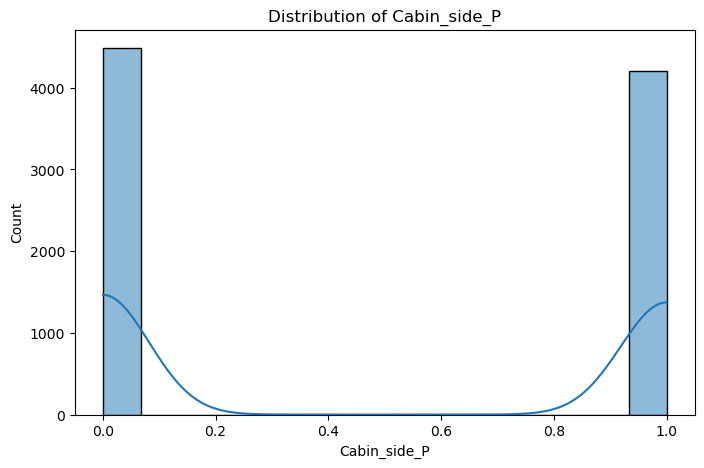

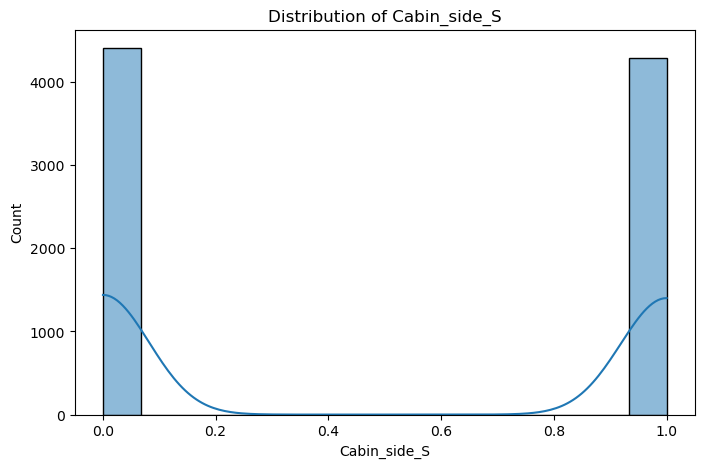

In [35]:
for col in train_normal.columns:
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the distribution plot
    sns.histplot(train_normal[col], ax=ax, kde=True)
    
    # Set the title of the plot
    ax.set_title(f'Distribution of {col}')
    
    # Show the plot
    plt.show()

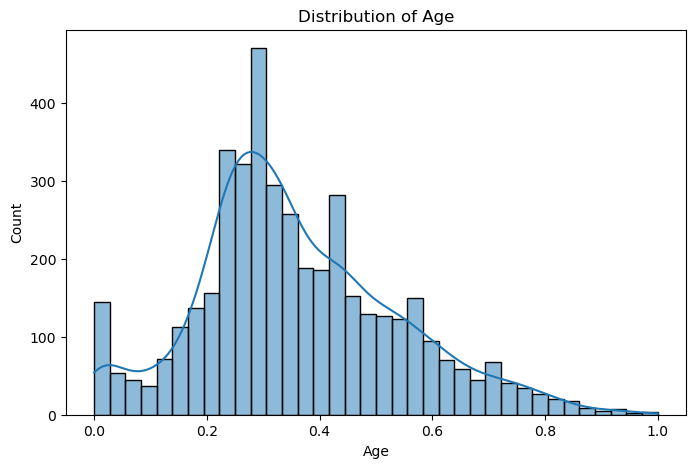

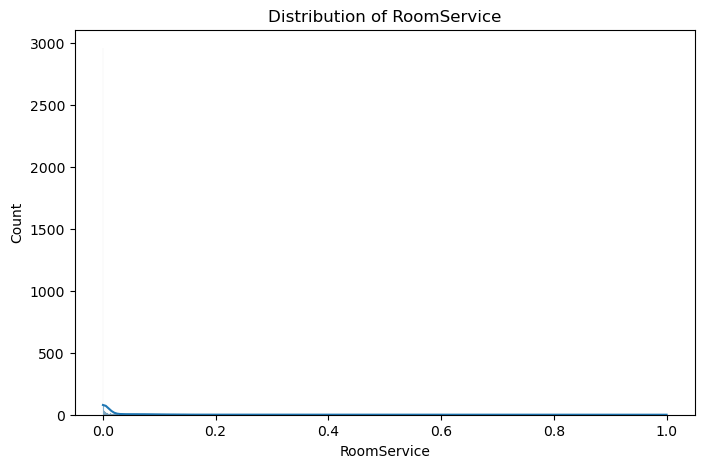

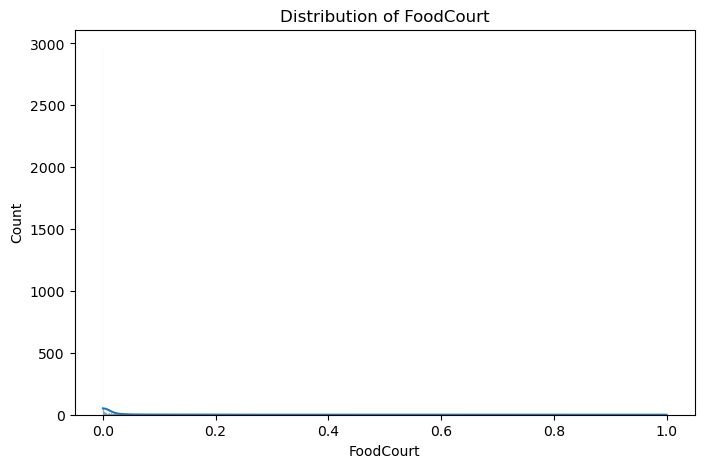

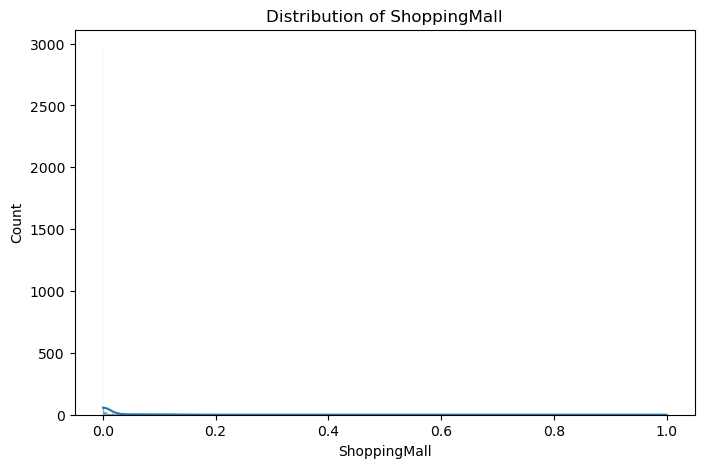

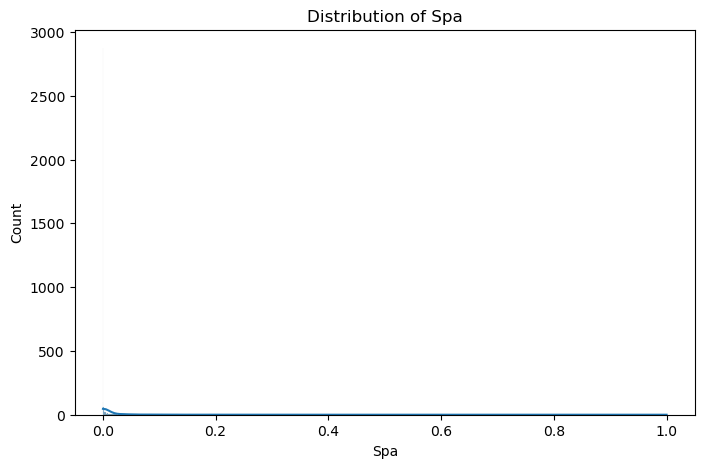

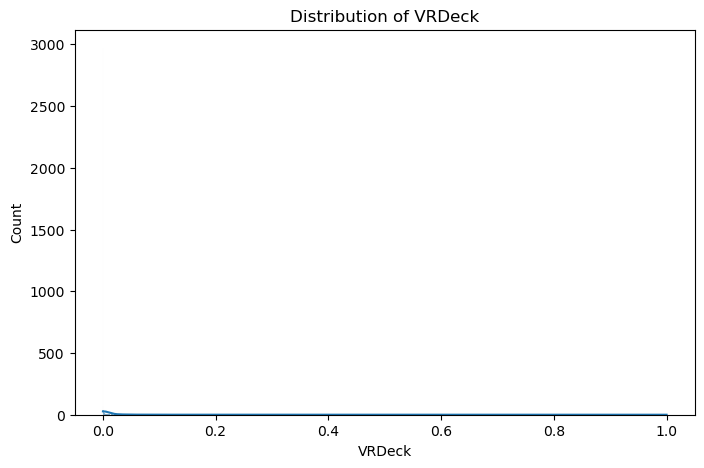

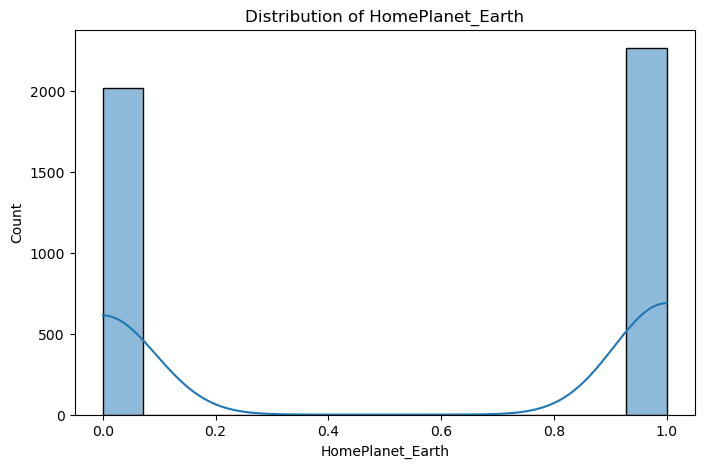

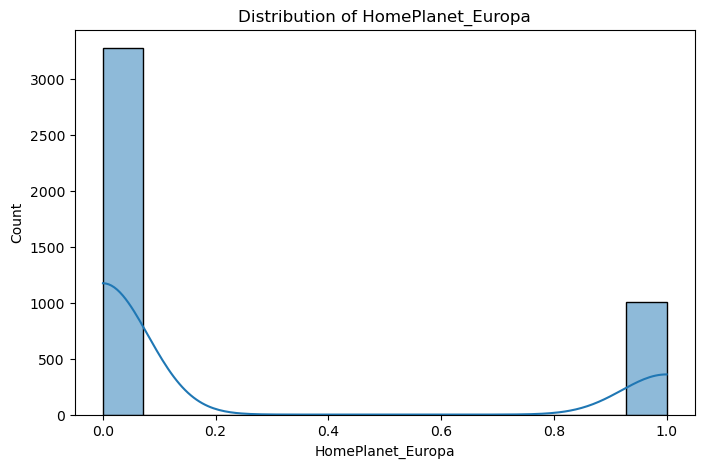

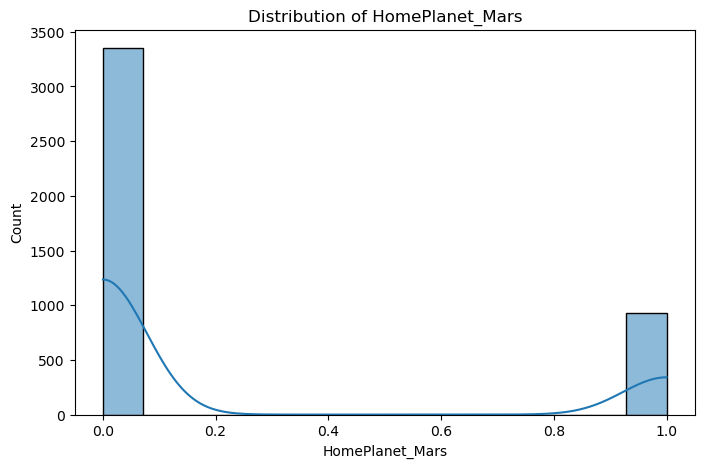

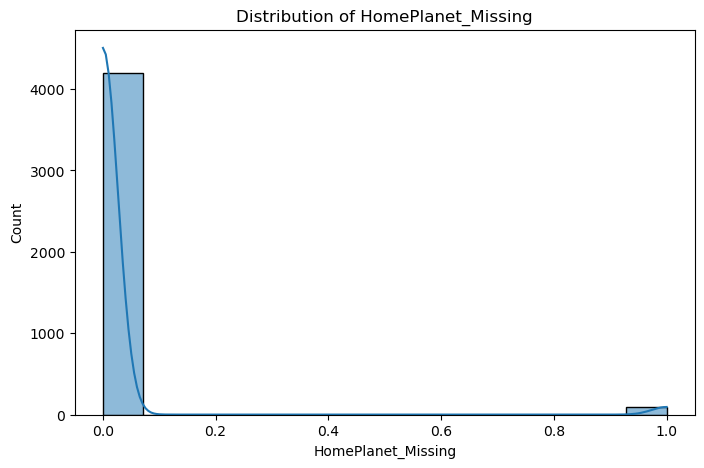

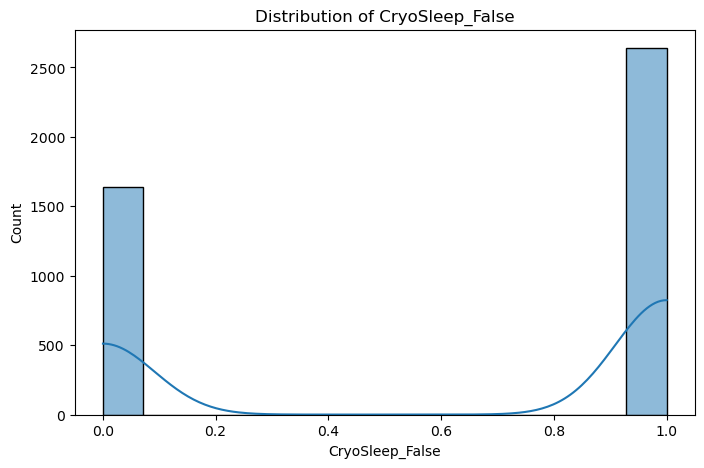

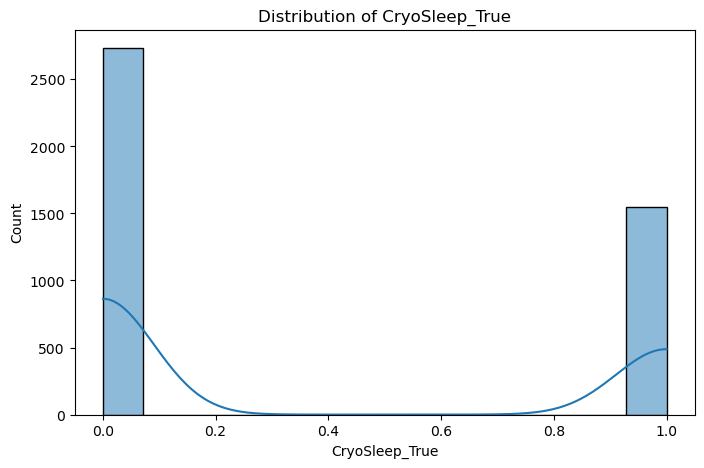

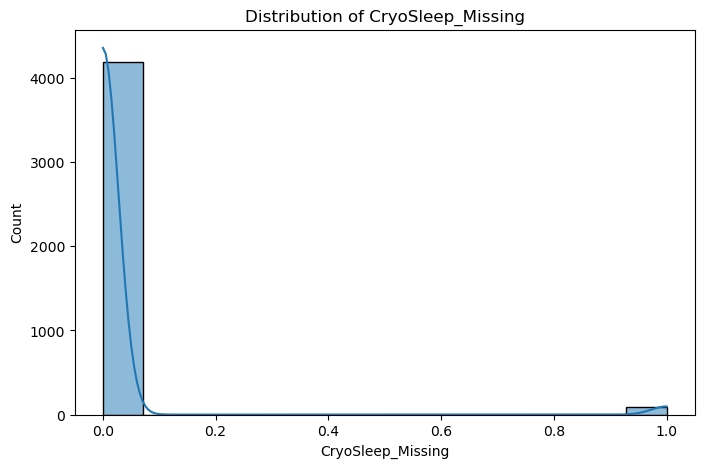

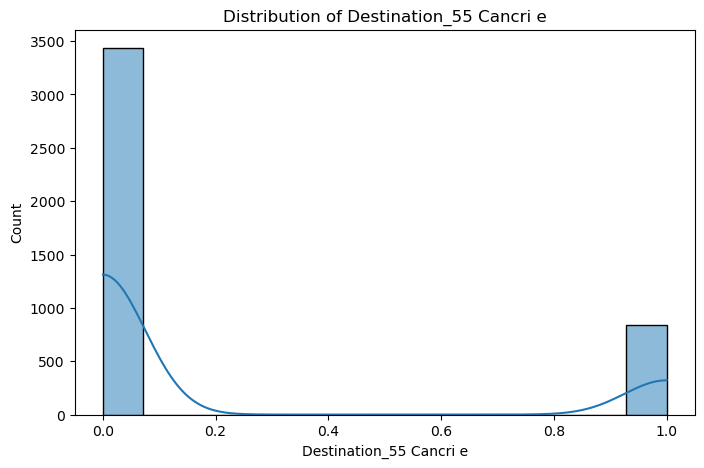

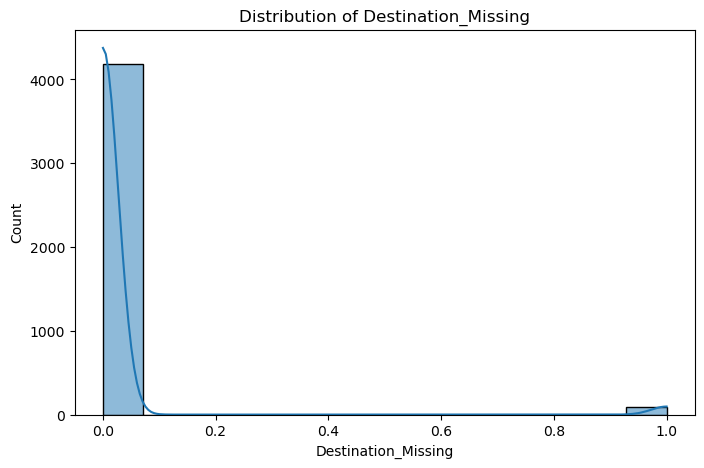

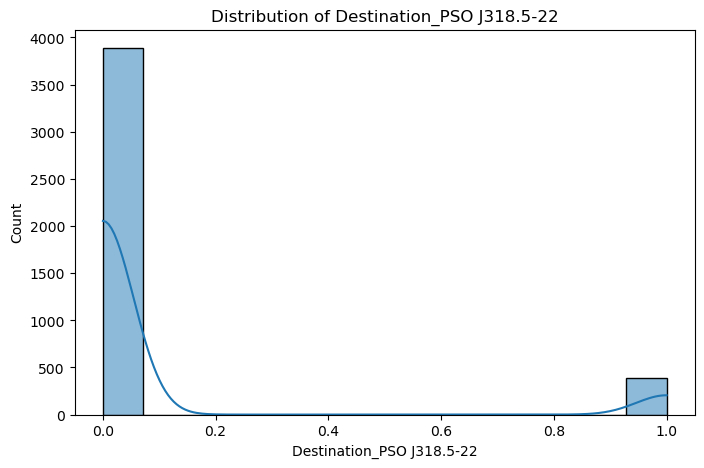

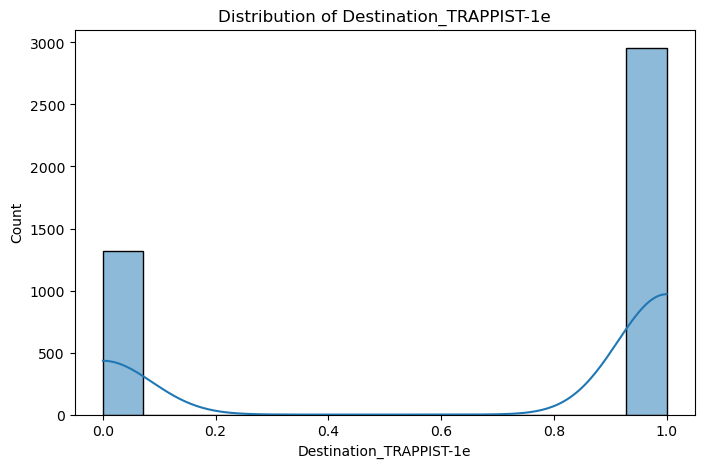

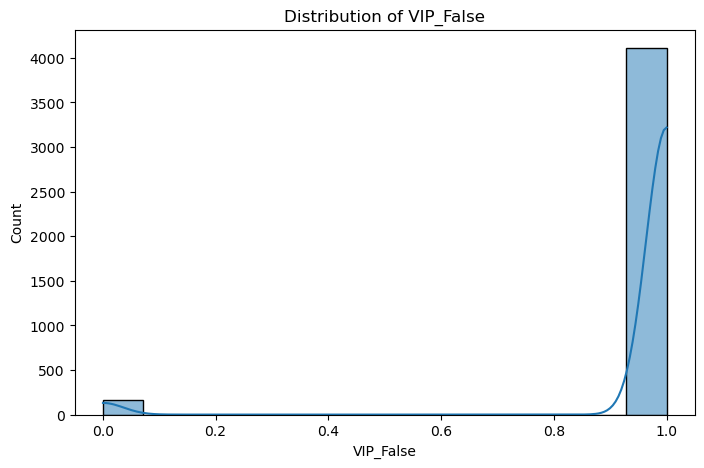

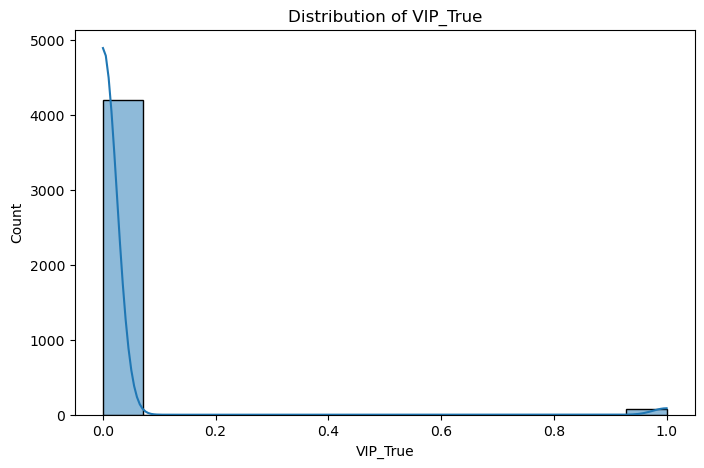

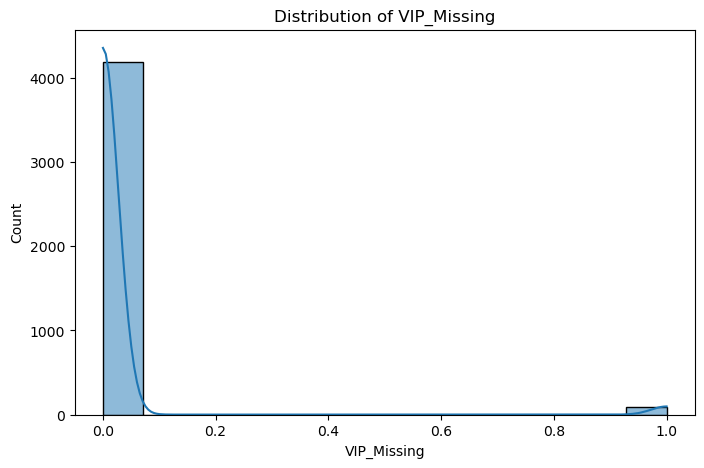

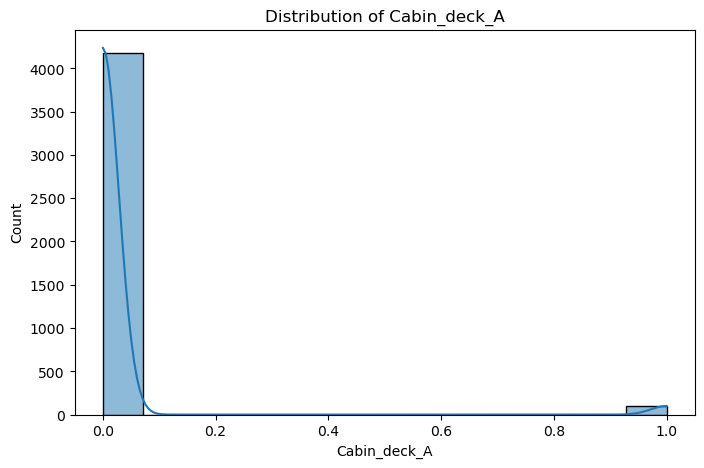

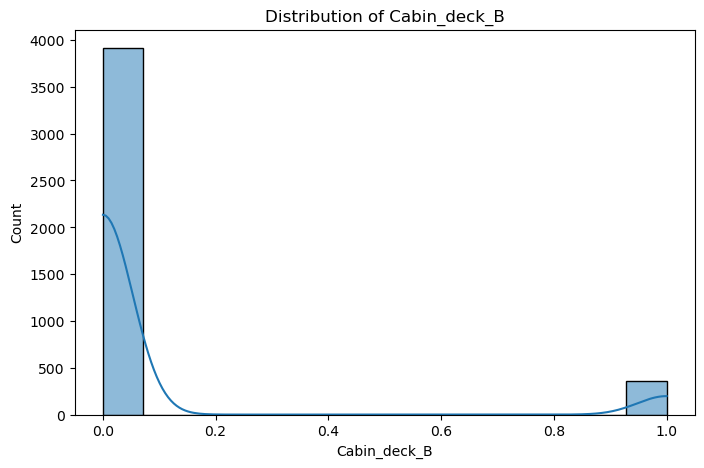

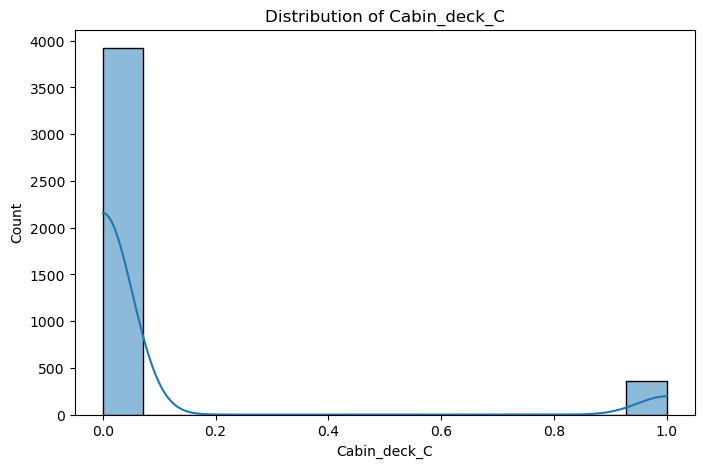

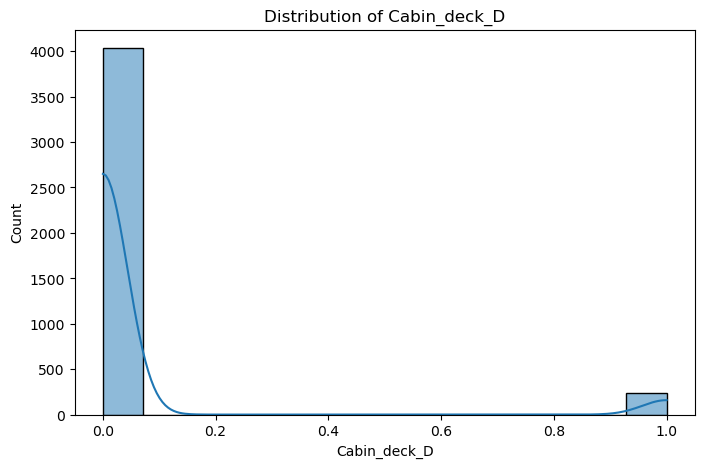

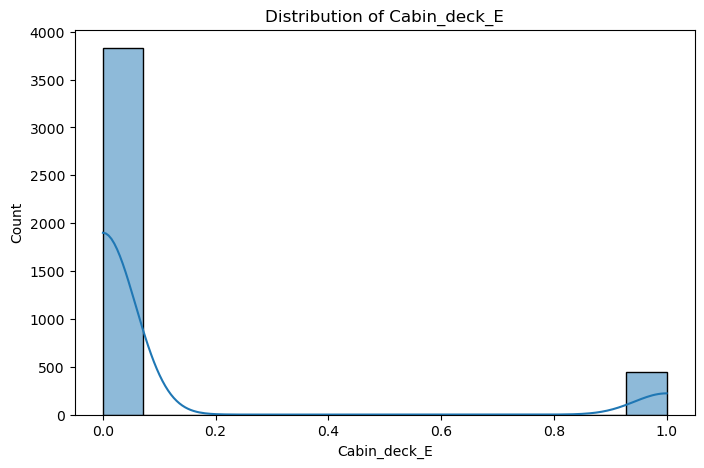

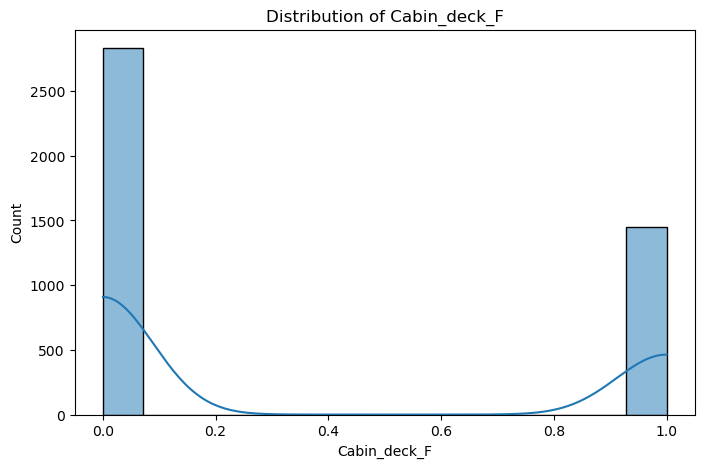

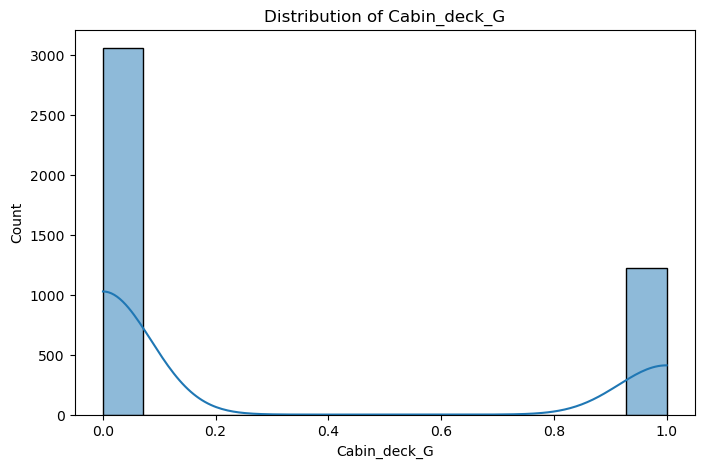

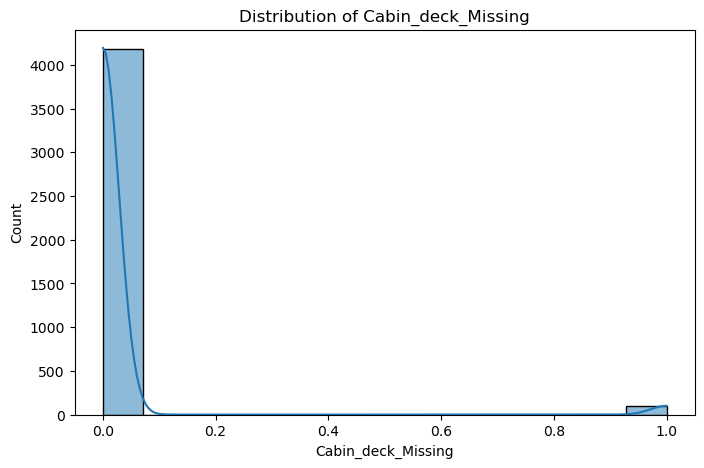

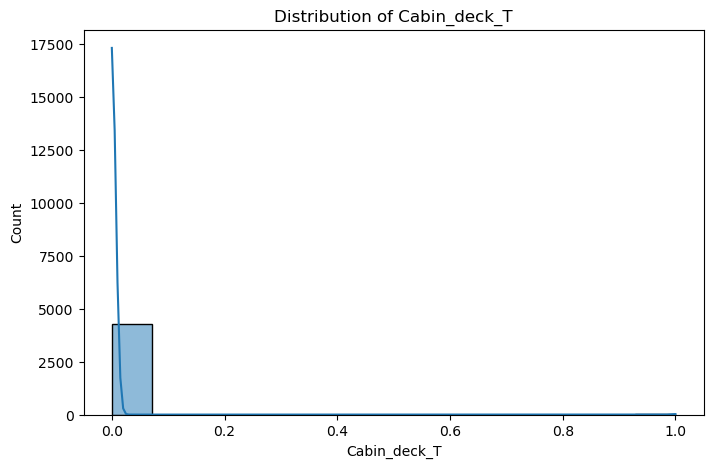

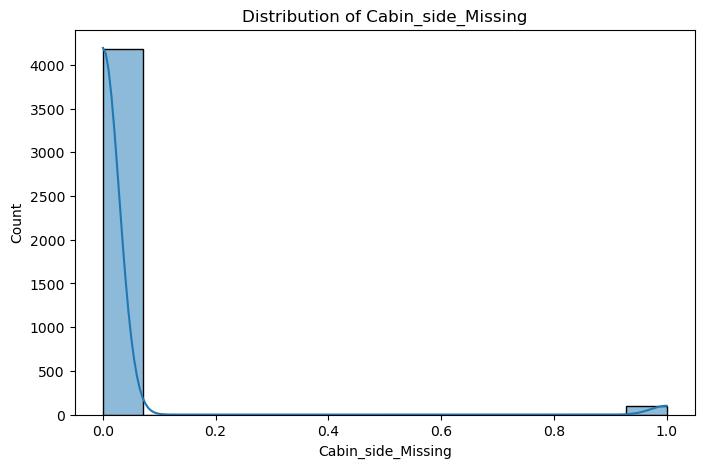

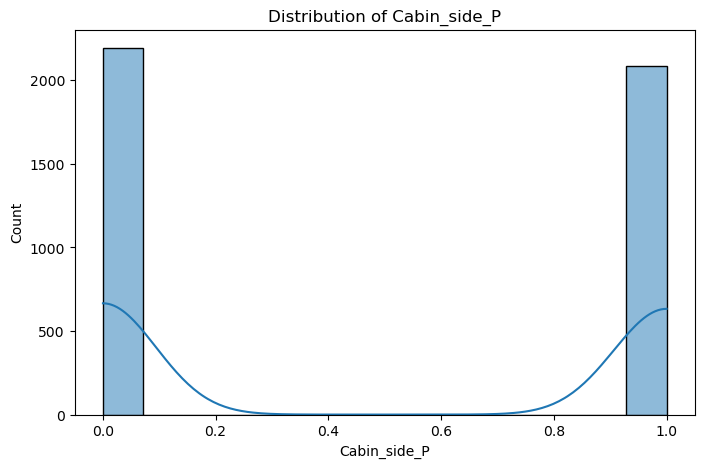

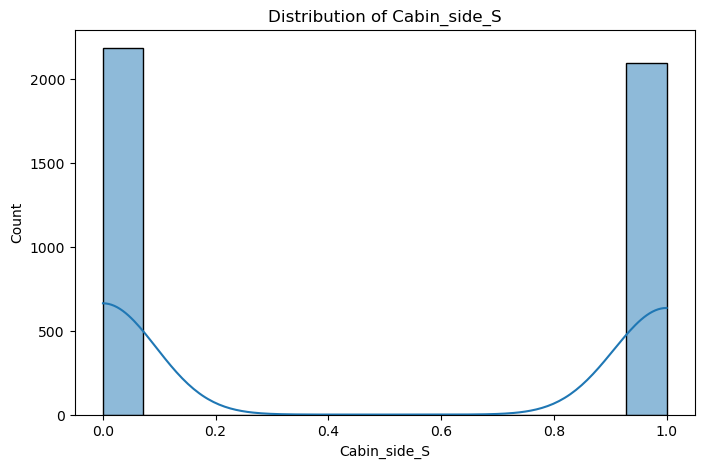

In [36]:
for col in test_normal.columns:
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the distribution plot
    sns.histplot(test_normal[col], ax=ax, kde=True)
    
    # Set the title of the plot
    ax.set_title(f'Distribution of {col}')
    
    # Show the plot
    plt.show()

When we compare the distributions, we can observe that they are very similar for all the columns giving us the idea that fitting the model to the train data as best as possible. Sometimes, if the distributions are different then the models that fit extremely on the training data would perform poorly on the test data which is undesirable.

Let us first train base models on our dataframes.

In [37]:
X = train.drop('Transported', axis=1)
y = train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:14<00:00,  2.04it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.79               0.79     0.79      0.79   
XGBClassifier                      0.79               0.79     0.79      0.79   
LinearSVC                          0.78               0.78     0.78      0.78   
CalibratedClassifierCV             0.78               0.78     0.78      0.78   
RandomForestClassifier             0.78               0.78     0.78      0.78   
SVC                                0.78               0.78     0.78      0.78   
LogisticRegression                 0.78               0.78     0.78      0.78   
BaggingClassifier                  0.78               0.78     0.78      0.78   
NuSVC                              0.78               0.78     0.78      0.78   
ExtraTreesClassifier               0.78               0.78     0.78      0.78   
AdaBoostClassifier          

Let us finetune the top 5 models from the above list using GridSearch CV and then predict from them.

In [38]:
pipelines = {
    'lgbm': make_pipeline(StandardScaler(), LGBMClassifier(random_state=1234)),
    'xgb': make_pipeline(StandardScaler(), XGBClassifier(random_state=1234)),
    'svc': make_pipeline(StandardScaler(), LinearSVC(random_state=1234)),
    'calibrated': make_pipeline(StandardScaler(), CalibratedClassifierCV(LinearSVC(random_state=1234))),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234))
}

# Define the parameters for grid search
parameters = {
    'lgbm': {
        'lgbmclassifier__boosting_type': ['gbdt', 'dart', 'goss'],
        'lgbmclassifier__num_leaves': [10, 20, 30],
        'lgbmclassifier__learning_rate': [0.1, 0.01]
    },
    'xgb': {
        'xgbclassifier__max_depth': [3, 6, 9],
        'xgbclassifier__learning_rate': [0.1, 0.01]
    },
    'svc': {
        'linearsvc__C': [0.1, 1, 10]
    },
    'calibrated': {
        'calibratedclassifiercv__base_estimator__C': [0.1, 1, 10]
    },
    'rf': {
        'randomforestclassifier__n_estimators': [100, 200],
        'randomforestclassifier__max_depth': [None, 5, 10]
    }
}

# Perform grid search for each pipeline
for pipeline_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[pipeline_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and best score
    print(f"Model: {pipeline_name}")
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    print()

Model: lgbm
Best parameters:  {'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__num_leaves': 10}
Best score:  0.8083812654067379

Model: xgb
Best parameters:  {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 6}
Best score:  0.8090386195562861

Model: svc
Best parameters:  {'linearsvc__C': 1}
Best score:  0.7958915365653245

Model: calibrated
Best parameters:  {'calibratedclassifiercv__base_estimator__C': 1}
Best score:  0.7958915365653245

Model: rf
Best parameters:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}
Best score:  0.8016433853738703



Now we have the hyperparameters for our models that gave us the best accuracy. We can make these values more fine-grained, however, as of now I am going to not do that.

We see that XGB gave us the highest score and then we have LGBM, RF, SVC, and Caliberated classifier CV respectively. Since the latter 2 have the same scores, we choose to train only one of them.

Let us get the predictions from these models with the hyperparamters generated.

In [39]:
X_train = train.drop(columns=['Transported'],axis=1)
y_train = train['Transported']

X_test = test

In [40]:
xgb_classifier = XGBClassifier(learning_rate=0.1, max_depth=6, random_state=1234)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
lgbm_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=20, learning_rate=0.1, random_state=1234)
lgbm_classifier.fit(X_train, y_train)
y_pred_lgbm = lgbm_classifier.predict(X_test)
rf_classifier = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=1234)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [41]:
df_xgb = pd.DataFrame()
df_lgbm = pd.DataFrame()
df_rf = pd.DataFrame()

df_xgb['PassengerId'] = passengers
df_lgbm['PassengerId'] = passengers
df_rf['PassengerId'] = passengers

In [42]:
df_xgb['Transported'] = y_pred_xgb
df_xgb['Transported'] = df_xgb['Transported'].replace({0: False, 1: True})
df_lgbm['Transported'] = y_pred_lgbm
df_rf['Transported'] = y_pred_rf

In [43]:
df_xgb.to_csv('Final_Submission_xgb.csv',index=False)
df_lgbm.to_csv('Final_Submission_lgbm.csv',index=False)
df_rf.to_csv('Final_Submission_rf.csv',index=False)

#### PCA

Let us now try using PCA on our dataframes and see if there is any difference in the accuracies of our models.

First we find out the number of useful columns.

In [44]:
X_train = train.drop(columns=['Transported'])
y_train = train['Transported']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

n_features = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

pca = PCA(n_components=n_features)
X_train_pca = pca.fit_transform(X_train_scaled)

print("Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))

print("Optimal Number of Features:", n_features)

Explained Variance Ratio: [0.10728597 0.1948268  0.26094602 0.32526694 0.38629923 0.44604874
 0.49641289 0.53564067 0.57100042 0.60562104 0.63946371 0.67255741
 0.70560278 0.73830177 0.77004309 0.80052321 0.82999699 0.85903813
 0.88622697 0.91233318 0.93750603 0.96090695]
Optimal Number of Features: 22


Let's Visualize the data in 2D and 3D space

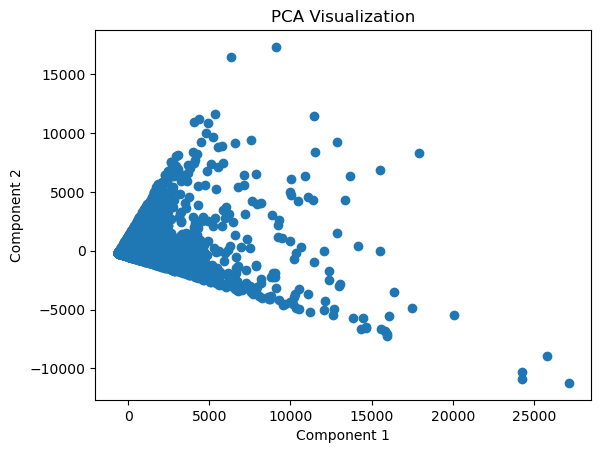

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Visualization')
plt.show()

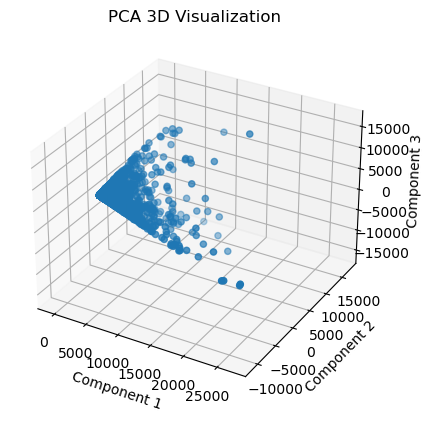

In [61]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA 3D Visualization')
plt.show()

In [45]:
selected_train = X_train.iloc[:, :22]
selected_test = test.iloc[:, :22]

Now we train our models on the reduced dataset and compare performance.

In [46]:
X = selected_train
y = train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.36it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.79               0.79     0.79      0.79   
AdaBoostClassifier                 0.78               0.78     0.78      0.78   
RandomForestClassifier             0.78               0.78     0.78      0.78   
XGBClassifier                      0.78               0.78     0.78      0.78   
LogisticRegression                 0.78               0.78     0.78      0.78   
ExtraTreesClassifier               0.78               0.78     0.78      0.78   
SGDClassifier                      0.78               0.78     0.78      0.78   
CalibratedClassifierCV             0.77               0.77     0.77      0.77   
LinearSVC                          0.77               0.77     0.77      0.77   
SVC                                0.77               0.77     0.77      0.77   
NuSVC                       

Let us get the top 5 models' best parameters.

In [48]:
pipelines = {
    'lgbm': make_pipeline(StandardScaler(), LGBMClassifier(random_state=1234)),
    'ada': make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1234)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'xgb': make_pipeline(StandardScaler(), XGBClassifier(random_state=1234)),
    'logreg': make_pipeline(StandardScaler(), LogisticRegression(random_state=1234))
}

parameters = {
    'lgbm': {
        'lgbmclassifier__boosting_type': ['gbdt', 'dart', 'goss'],
        'lgbmclassifier__num_leaves': [20, 30, 40],
        'lgbmclassifier__learning_rate': [0.1, 0.01, 0.001],
        'lgbmclassifier__n_estimators': [100, 200, 300]
    },
    'ada': {
        'adaboostclassifier__n_estimators': [50, 100, 200],
        'adaboostclassifier__learning_rate': [0.1, 0.01, 0.001]
    },
    'rf': {
        'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [5, 10, 15],
        'randomforestclassifier__min_samples_split': [2, 5, 10]
    },
    'xgb': {
        'xgbclassifier__max_depth': [3, 6, 9],
        'xgbclassifier__learning_rate': [0.1, 0.01, 0.001],
        'xgbclassifier__n_estimators': [100, 200, 300]
    },
    'logreg': {
        'logisticregression__C': [0.1, 1, 10],
        'logisticregression__penalty': ['l1', 'l2']
    }
}

for pipeline_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[pipeline_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and best score
    print(f"Model: {pipeline_name}")
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    print()

Model: lgbm
Best parameters:  {'lgbmclassifier__boosting_type': 'dart', 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 200, 'lgbmclassifier__num_leaves': 20}
Best score:  0.7990139687756779

Model: ada
Best parameters:  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 200}
Best score:  0.7911257189811011

Model: rf
Best parameters:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
Best score:  0.7985209531635169

Model: xgb
Best parameters:  {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}
Best score:  0.7978635990139689

Model: logreg
Best parameters:  {'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}
Best score:  0.790468364831553



We observe that with the reduction of features, the accuracy of the models has reduced. PCA might not be necessary for this particular task because the models themselves do not take long to train even with the non-reduced dataset containing 32 features (Highest being about 2 seconds with 79% accuracy). For the reduced dataset, the highest is 2 seconds (same model) with 77% accuracy.

In [49]:
X_train = selected_train
y_train = train['Transported']

X_test = selected_test

In [50]:
pipeline = make_pipeline(StandardScaler(), LGBMClassifier(boosting_type='dart', learning_rate=0.1, n_estimators=200, num_leaves=20, random_state=1234))
pipeline.fit(X_train, y_train)
y_pred_lgbm = pipeline.predict(X_test)

In [51]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=100, random_state=1234))
pipeline.fit(X_train, y_train)
y_pred_rf = pipeline.predict(X_test)

In [52]:
pipeline = make_pipeline(StandardScaler(), XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=1234))
pipeline.fit(X_train, y_train)
y_pred_xgb = pipeline.predict(X_test)

In [53]:
pipeline = make_pipeline(StandardScaler(), AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=1234))
pipeline.fit(X_train, y_train)
y_pred_ada = pipeline.predict(X_test)

In [54]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=10, penalty='l2', random_state=1234))
pipeline.fit(X_train, y_train)
y_pred_lreg = pipeline.predict(X_test)

In [55]:
output = pd.read_csv('test.csv')
df_xgb1 = pd.DataFrame()
df_lgbm1 = pd.DataFrame()
df_rf1 = pd.DataFrame()
df_ada1 = pd.DataFrame()
df_lreg1 = pd.DataFrame()

df_xgb1['PassengerId'] = passengers
df_lgbm1['PassengerId'] = passengers
df_rf1['PassengerId'] = passengers
df_ada1['PassengerId'] = passengers
df_lreg1['PassengerId'] = passengers

In [56]:
df_xgb1['Transported'] = y_pred_xgb
df_lgbm1['Transported'] = y_pred_lgbm
df_rf1['Transported'] = y_pred_rf
df_ada1['Transported'] = y_pred_ada
df_lreg1['Transported'] = y_pred_lreg

In [57]:
df_xgb1['Transported'] = df_xgb1['Transported'].replace({0: False, 1: True})

In [58]:
df_xgb1.to_csv('Final_submission_pca_xgb.csv',index=False)
df_lgbm1.to_csv('Final_submission_pca_lgbm.csv',index=False)
df_rf1.to_csv('Final_submission_pca_rf.csv',index=False)
df_ada1.to_csv('Final_submission_pca_ada.csv',index=False)
df_lreg1.to_csv('Final_submission_pca_lreg.csv',index=False)